# Complex Sentiment Index :: tweet counts

In [22]:
coins = [
#     'BTC',   # 1
    'ETH',   # 2
#     'BNB',   # 3
#     'DOT',   # 4
#     'SOL',   # 5
#     'LUNA',  # 6
#     'ADA',   # 7
#     'CRO',   # 8
#     'AXS',   # 9
#     'SAND',  # 10
#     'DOGE',  # 11
#     'SHIB',  # 12
#     'MATIC', # 13
]

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm

dt_now = datetime.utcnow()

def gather_tweet_counts(coin, dt=datetime(2021, 12, 9, 12, 0)):

    df_tc = pd.DataFrame()

    while True:
        if dt > dt_now:
            break
        start_time = dt.strftime('%Y-%m-%dT%H-%M-%SZ')
#         print(f"Processing: {start_time}")
        try:
            df = pd.read_csv(f"tweet-counts/{coin}-{start_time}.csv")
        except Exception as e:
            print(e)
            dt = dt + timedelta(hours=1)
            continue
        df['start'] = pd.to_datetime(df['start'])
        df['end'] = pd.to_datetime(df['end'])
        df = df.set_index('end')
        
#         print(df.iloc[0])
#         print(df.iloc[-1])
#         print('---')
        
        df_tc = pd.concat([df_tc, df]).drop_duplicates()
        dt = dt + timedelta(hours=1)
            
    # oddly, datapoints are different (yet similar) every time, so we keep their max
    return df_tc.groupby('end').max()

# df_tc = gather_tweet_counts('BTC')

In [24]:
dfs = {}

for coin in tqdm(coins, desc="Loading tweet counts...", ncols=100):
    dfs[coin] = gather_tweet_counts(coin)

Loading tweet counts...:   0%|                                                | 0/1 [00:00<?, ?it/s]

[Errno 2] File tweet-counts/ETH-2022-01-28T02-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T02-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-01-28T03-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T03-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-01-28T04-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T04-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-01-28T05-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T05-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-01-28T06-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T06-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-01-28T07-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T07-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-01-28T08-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T08-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-01-28T09-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-01-28T09-00-00Z.csv'


Loading tweet counts...: 100%|████████████████████████████████████████| 1/1 [00:32<00:00, 32.68s/it]

[Errno 2] File tweet-counts/ETH-2022-02-26T21-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-26T21-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-26T22-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-26T22-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-26T23-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-26T23-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-27T00-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-27T00-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-27T01-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-27T01-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-27T02-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-27T02-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-27T03-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-27T03-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-27T04-00-00Z.csv does not exist: 'tweet-counts/ETH-2022-02-27T04-00-00Z.csv'
[Errno 2] File tweet-counts/ETH-2022-02-27T05-00-00Z.csv does no

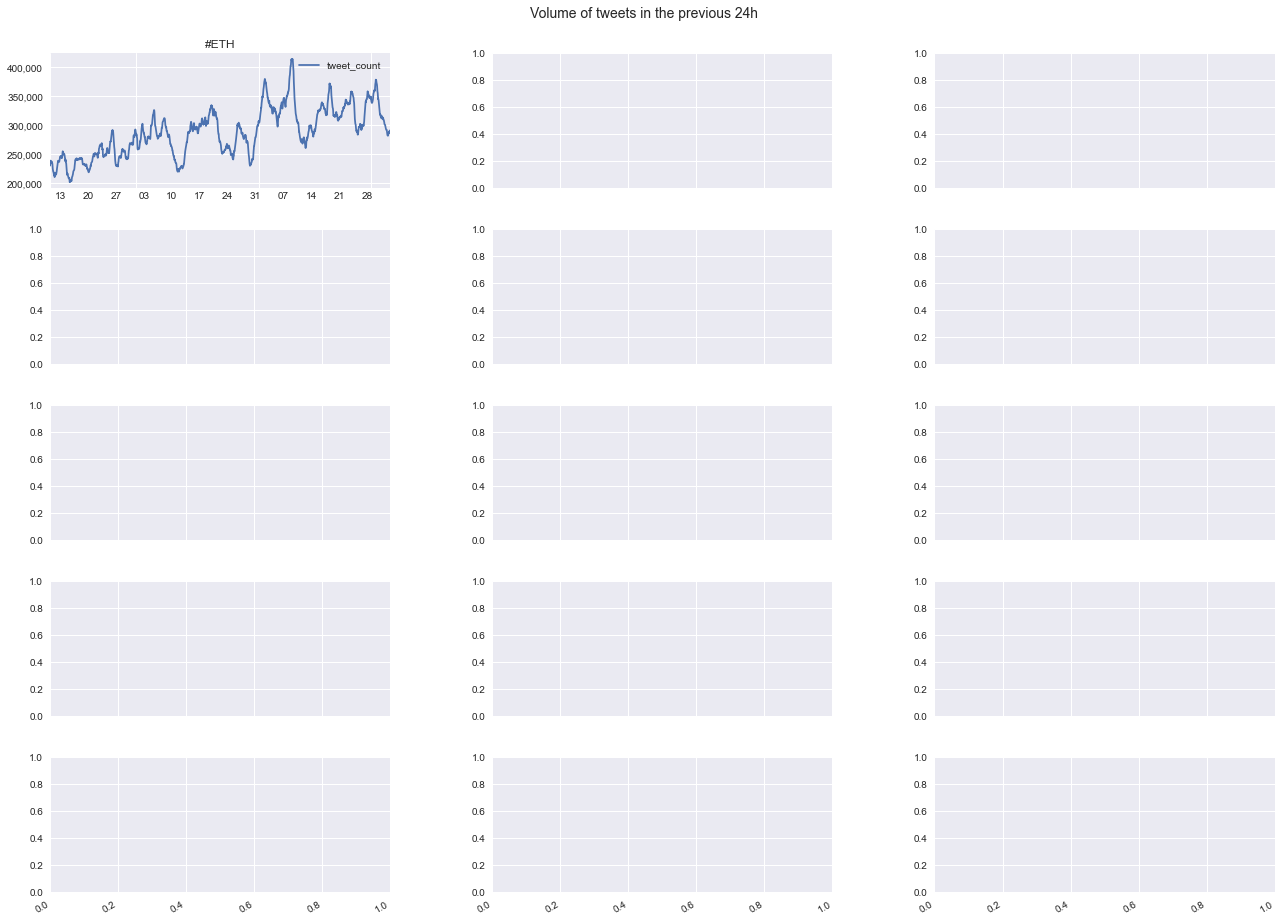

In [25]:
import matplotlib.dates as mdates

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (18, 15)

fig, axes = plt.subplots(nrows=5, ncols=3)

for k, (coin, df) in enumerate(dfs.items()):
    
    i, j = int(k / 3), k % 3
    df['tweet_count'].rolling(window=24).sum().dropna().plot(
        legend='best', title=f"#{coin}", ax=axes[i, j])
    axes[i, j].get_xaxis().set_label_text('')
    axes[i, j].get_yaxis().set_major_formatter(
       FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.subplots_adjust(wspace=.3, hspace=.3)
plt.suptitle("Volume of tweets in the previous 24h", fontsize=14, y=1.02)
plt.gca().get_xaxis().set_label_text('')
plt.gcf().autofmt_xdate()

plt.savefig(f"tweet-counts/{coin}-{df.index[-1].strftime('%Y-%m-%dT%H-%M-%SZ')}.png", 
            facecolor=fig.get_facecolor(), transparent=False)
plt.show()

In [26]:
for coin, df in dfs.items():
    df.to_csv(f"tweet-counts/joined-{coin}.csv")

In [27]:
df

,start,tweet_count
end,,
2021-12-09 13:00:00+00:00,2021-12-09 12:00:00+00:00,9426
2021-12-09 14:00:00+00:00,2021-12-09 13:00:00+00:00,10449
2021-12-09 15:00:00+00:00,2021-12-09 14:00:00+00:00,10088
2021-12-09 16:00:00+00:00,2021-12-09 15:00:00+00:00,13062
2021-12-09 17:00:00+00:00,2021-12-09 16:00:00+00:00,13106
...,...,...
2022-03-05 15:00:00+00:00,2022-03-05 14:00:00+00:00,16097
2022-03-05 16:00:00+00:00,2022-03-05 15:00:00+00:00,15919
2022-03-05 17:00:00+00:00,2022-03-05 16:00:00+00:00,16821
